In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
df = pd.read_csv("C:/Users/archa/Downloads/bank-additional.csv",delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [15]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [21]:
df.shape

(4119, 21)

In [23]:
df.info

<bound method DataFrame.info of       age          job  marital          education default  housing     loan  \
0      30  blue-collar  married           basic.9y      no      yes       no   
1      39     services   single        high.school      no       no       no   
2      25     services  married        high.school      no      yes       no   
3      38     services  married           basic.9y      no  unknown  unknown   
4      47       admin.  married  university.degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married           basic.6y      no      yes      yes   
4115   39       admin.  married        high.school      no      yes       no   
4116   27      student   single        high.school      no       no       no   
4117   58       admin.  married        high.school      no       no       no   
4118   34   management   single        high.school      no      yes       no   

       

In [27]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [31]:
categorical_columns=df.select_dtypes(include='object').columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')

In [33]:
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
numerical_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

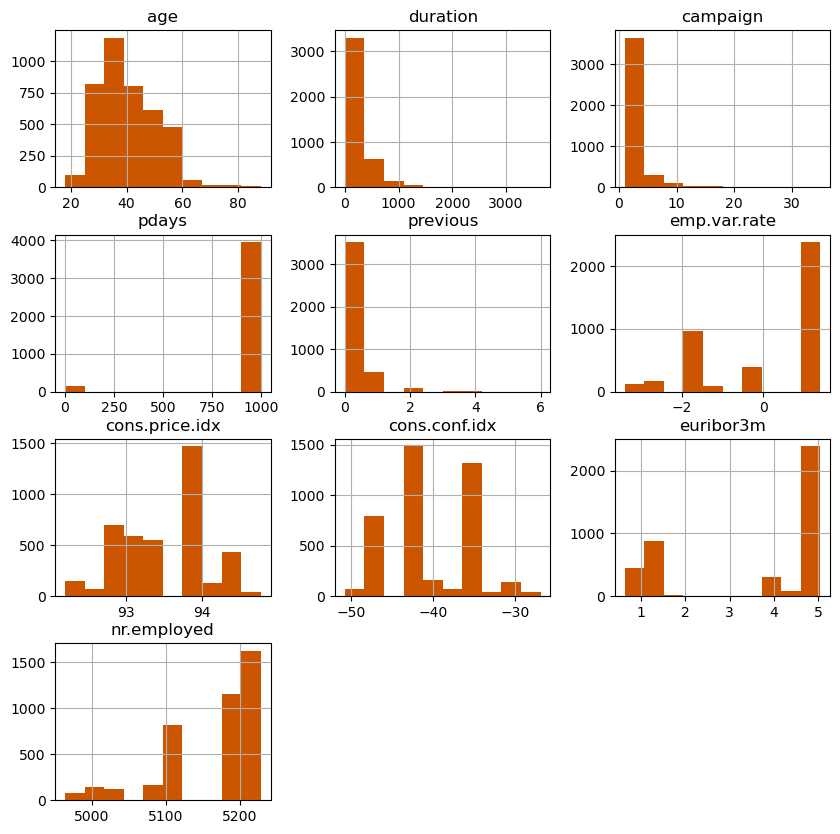

In [47]:
df.hist(figsize=(10,10),color='#cc5500')
plt.show()

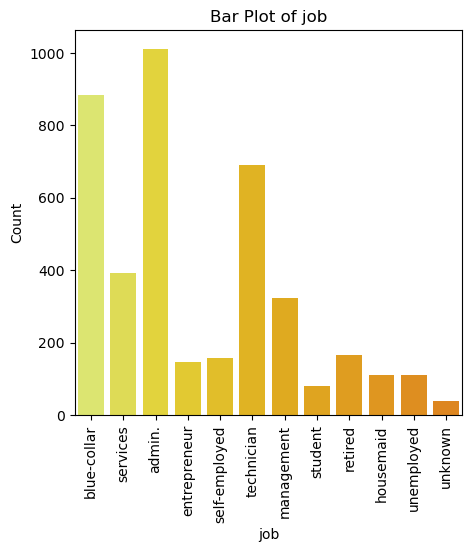

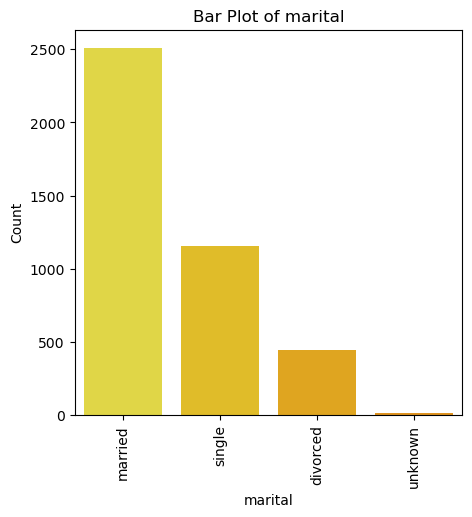

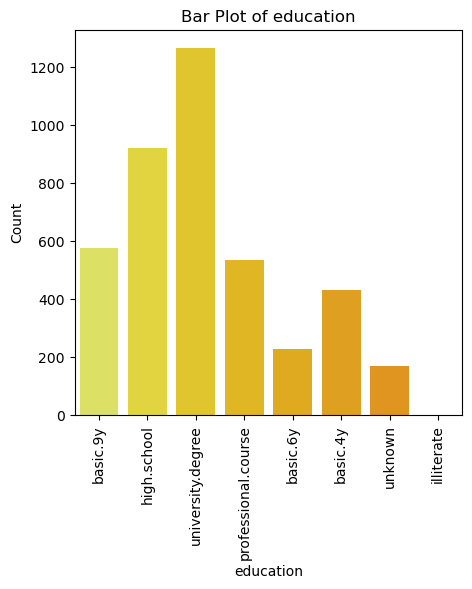

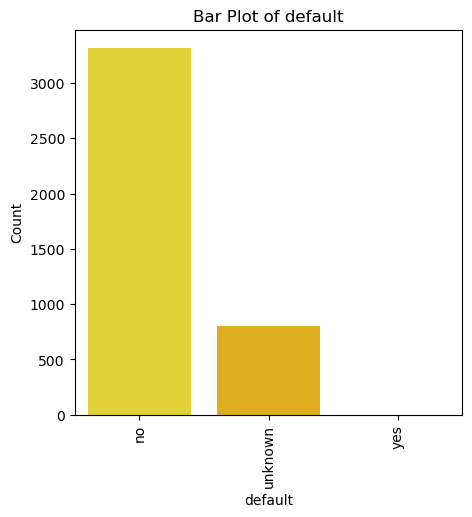

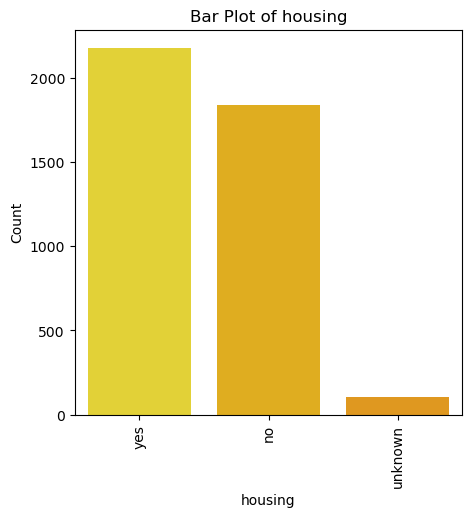

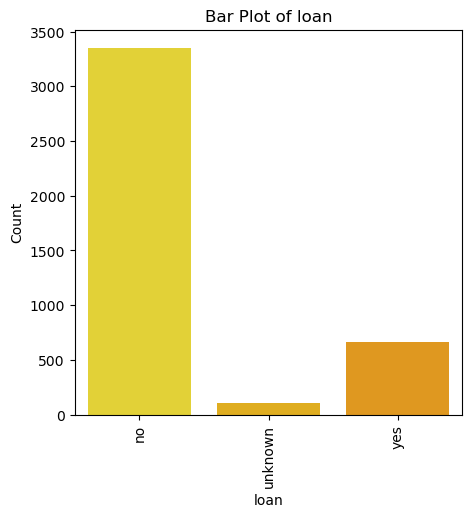

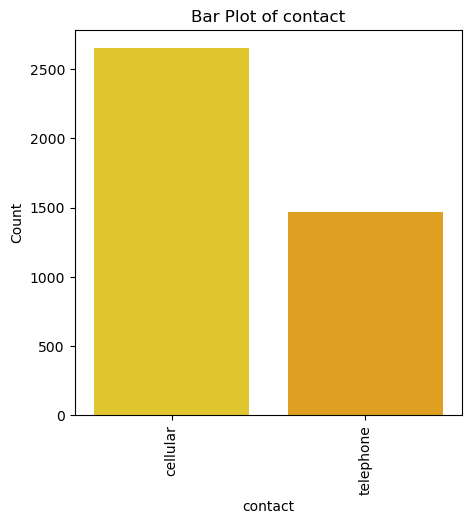

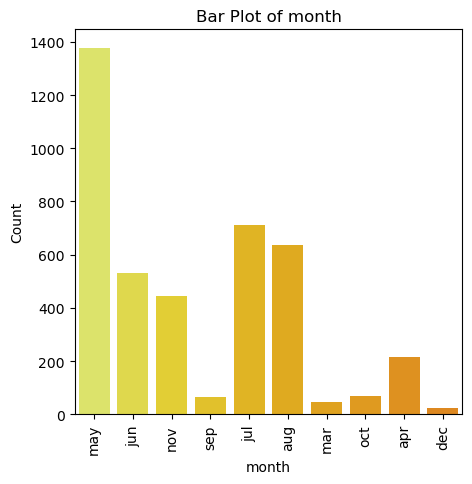

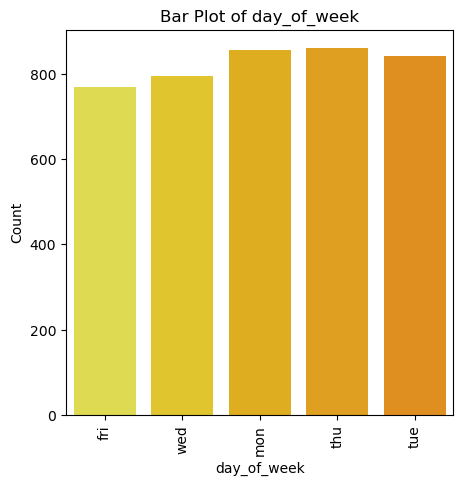

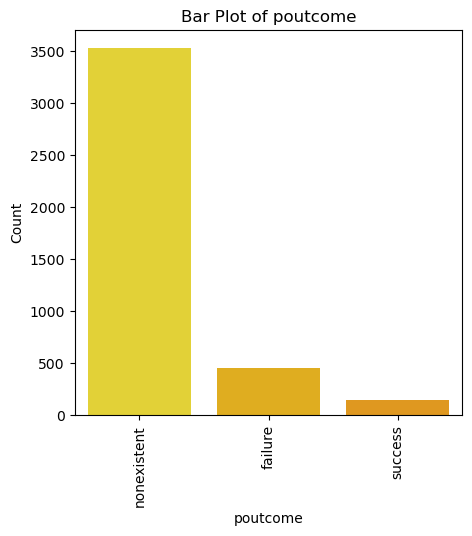

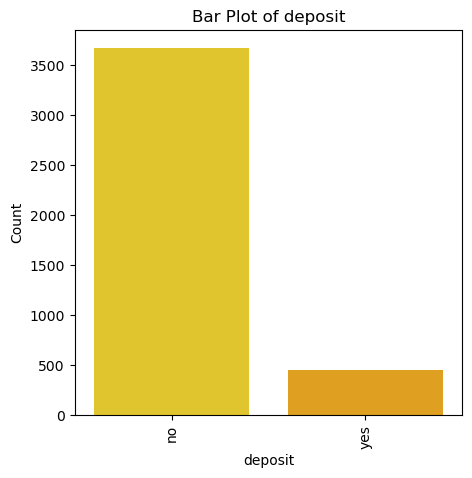

In [49]:
for feature in categorical_columns:
    plt.figure(figsize=(5,5))  # Adjust the figure size as needed
    sns.countplot(x=feature, data=df, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

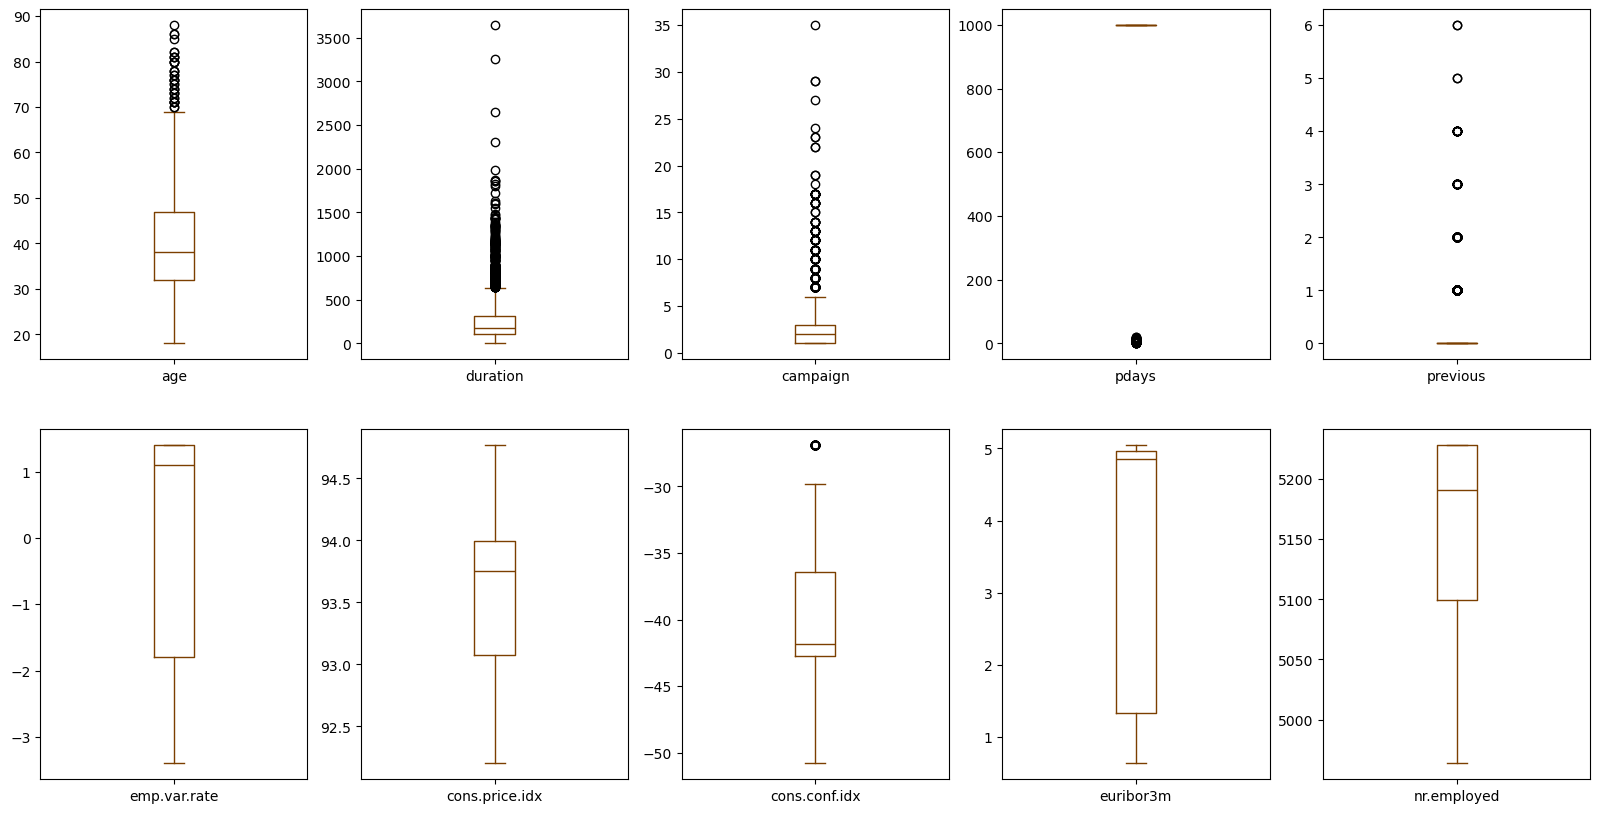

In [51]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.041299 -0.014169 -0.043425  0.050931   
duration        0.041299  1.000000 -0.085348 -0.046998  0.025724   
campaign       -0.014169 -0.085348  1.000000  0.058742 -0.091490   
pdays          -0.043425 -0.046998  0.058742  1.000000 -0.587941   
previous        0.050931  0.025724 -0.091490 -0.587941  1.000000   
emp.var.rate   -0.019192 -0.028848  0.176079  0.270684 -0.415238   
cons.price.idx -0.000482  0.016672  0.145021  0.058472 -0.164922   
cons.conf.idx   0.098135 -0.034745  0.007882 -0.092090 -0.051420   
euribor3m      -0.015033 -0.032329  0.159435  0.301478 -0.458851   
nr.employed    -0.041936 -0.044218  0.161037  0.381983 -0.514853   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.019192       -0.000482       0.098135  -0.015033   
duration           -0.028848        0.016672      -0.034745  -0.032329   
campaign            0.176079 

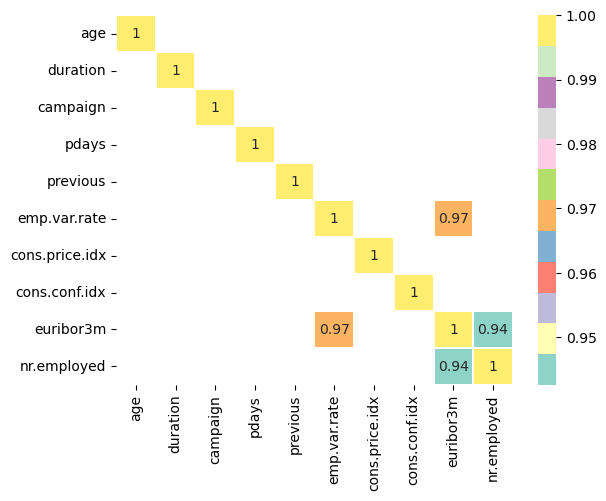

In [53]:
corr = df.select_dtypes(include='number').corr()
print(corr)
corr = corr[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [55]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']


In [57]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [59]:
df1.drop(high_corr_cols,inplace=True,axis=1)  # axis=1 indicates columns
df1.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [61]:
df1.shape

(4119, 18)

In [63]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,474,1,20,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,343,3,20,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,20,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,20,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,20,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,510,0,20,0,1,13,17,0


In [65]:
df_encoded['deposit'].value_counts()

deposit
0    3668
1     451
Name: count, dtype: int64

In [67]:
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))


(4119, 17)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [69]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 17)
(1030, 17)
(3089,)
(1030,)


In [73]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)


In [75]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [77]:
mscore(dt)


Training Score 0.923276141146002
Testing Score 0.9116504854368932


In [79]:
ypred_dt = dt.predict(x_test)



In [81]:
eval_model(y_test,ypred_dt)


Accuracy_Score 0.9116504854368932
Confusion Matrix
 [[913  17]
 [ 74  26]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       930
           1       0.60      0.26      0.36       100

    accuracy                           0.91      1030
   macro avg       0.76      0.62      0.66      1030
weighted avg       0.89      0.91      0.90      1030



In [83]:
from sklearn.tree import plot_tree


In [85]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


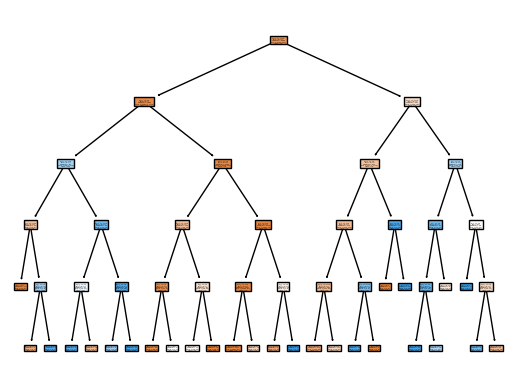

In [87]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()


In [89]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [91]:
mscore(dt1)


Training Score 0.9145354483651668
Testing Score 0.916504854368932


In [93]:
ypred_dt1 = dt1.predict(x_test)

In [95]:
eval_model(y_test,ypred_dt1)


Accuracy_Score 0.916504854368932
Confusion Matrix
 [[912  18]
 [ 68  32]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       930
           1       0.64      0.32      0.43       100

    accuracy                           0.92      1030
   macro avg       0.79      0.65      0.69      1030
weighted avg       0.90      0.92      0.90      1030



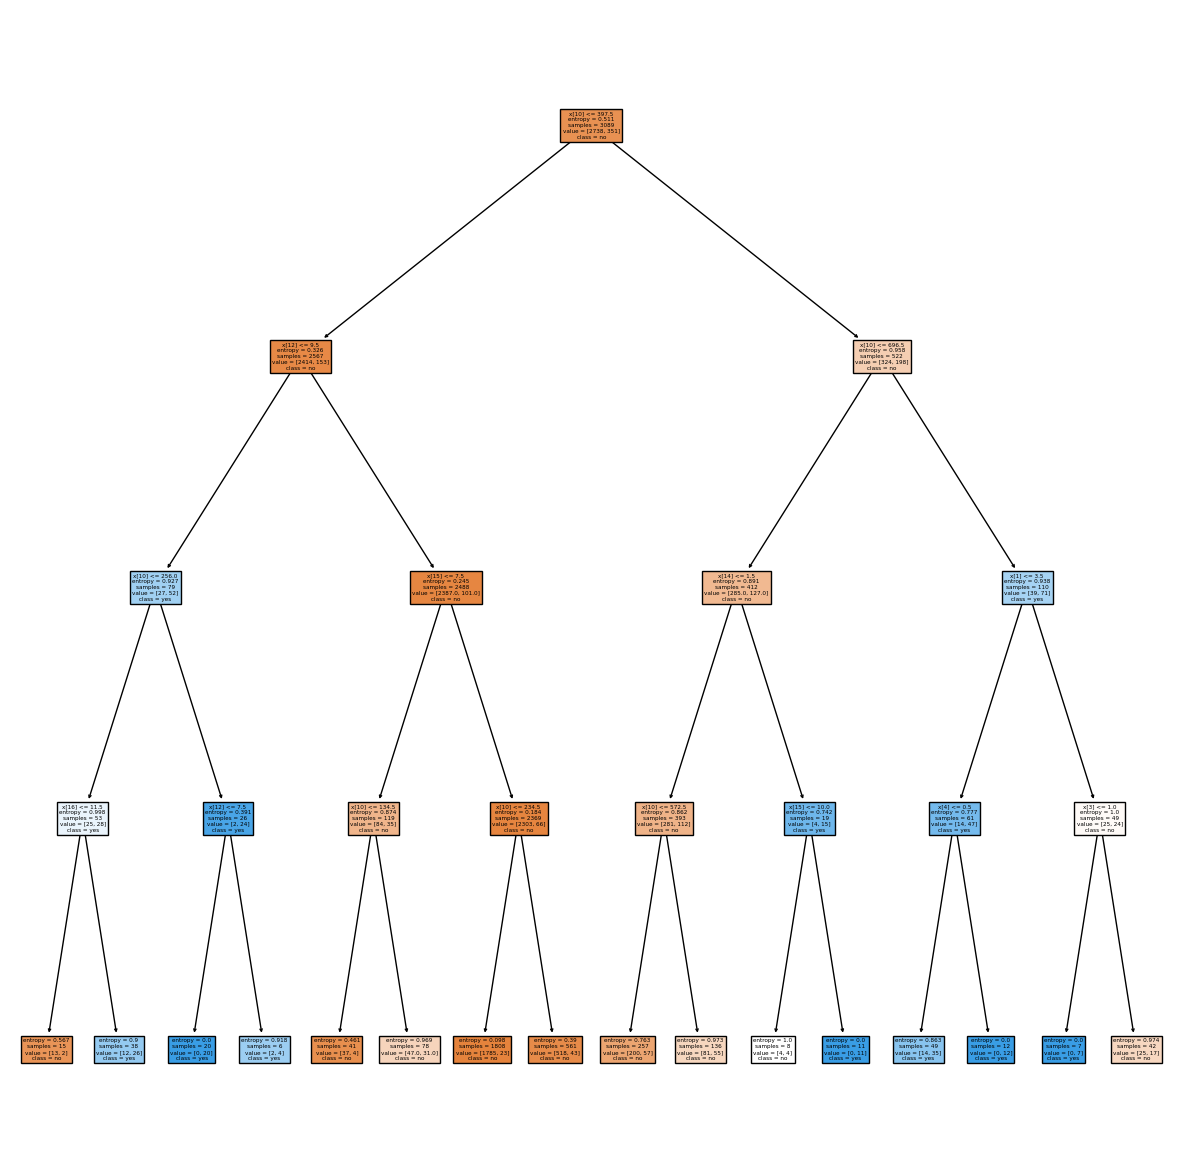

In [97]:
plt.figure(figsize=(15,15))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()
